#   [Py4Hw User Guide](../UserGuide.ipynb)> 1.9 Abstract Logic
###  [Next: 2.1 Bitwise Logic Operations](../s02/logic.ipynb)

As Python, py4hw is highly dynamic in nature. This means you can manipulate objects during runtime.
Creating modules that encapsulate logic is a powerfull method that helps to understand the hiererachical nature of complex circuits. However, creating invididual classes for such agrupations sometimes can be tedious.

In some cases it might be worth to define classes during runtime (rather statically in the source code) to encapsulate some circuits in a semantically related group.

For instance, lets build a circuit that checks is a value is between some ranges. To check for the range, we use comparators, but we would like to maintain the hierarchy.  

In [1]:
import py4hw

class RangeDetector(py4hw.Logic):
    def __init__(self, parent:py4hw.Logic, name:str, a:py4hw.Wire, ranges:list, r:list):
        
        super().__init__(parent, name)
        
        self.addIn('a', a)
        
        for idx, ri in enumerate(r):
            self.createRangeDetector(ranges, idx, ri)

    def createRangeDetector(self, ranges, idx, ri):
        self.addOut(f'r{idx}', ri)

        lv = ranges[idx][0] # low value
        hv = ranges[idx][1] # high value

        lvk = self.wire(f'k{idx}_{lv}', a.getWidth())
        hvk = self.wire(f'k{idx}_{hv}', a.getWidth())

        py4hw.Constant(self, f'k{idx}_{lv}', lv, lvk)
        py4hw.Constant(self, f'k{idx}_{hv}', hv, hvk)

        gtl = self.wire(f'gtl_{idx}')
        eql = self.wire(f'eql_{idx}')
        ltl = self.wire(f'ltl_{idx}')
        gth = self.wire(f'gth_{idx}')
        eqh = self.wire(f'eqh_{idx}')
        lth = self.wire(f'lth_{idx}')

        gtel = self.wire(f'gtel_{idx}')
        lteh = self.wire(f'lteh_{idx}')

        py4hw.Comparator(self, f'cmp_low_{idx}', a, lvk, gtl, eql, ltl)
        py4hw.Comparator(self, f'cmp_high_{idx}', a, hvk, gth, eqh, lth)

        py4hw.Or2(self, f'gtel_{idx}', gtl, eql, gtel)
        py4hw.Or2(self, f'lteh_{idx}', lth, eqh, lteh)

        py4hw.And2(self, f'r{idx}', gtel, lteh, ri)

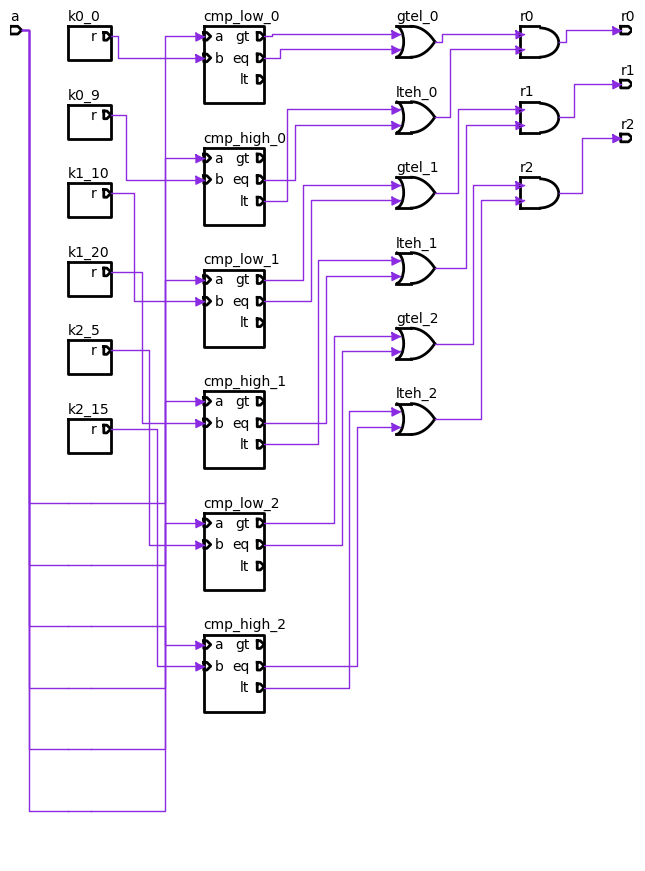

In [2]:
hw = py4hw.HWSystem()

a = hw.wire('a', 8)
r = hw.wires('r', 3, 1)

py4hw.Sequence(hw, 'a', [1,2,4,8,12,16,21,30], a)
RangeDetector(hw, 'dut', a, [[0,9], [10,20], [5,15]], r)

sch = py4hw.Schematic(hw.children['dut'])

sch.draw()

The structure organization can be encapsulated in abstract classes so that is visualized in a more compact way.

In [3]:
import py4hw

class RangeDetector(py4hw.Logic):
    def __init__(self, parent:py4hw.Logic, name:str, a:py4hw.Wire, ranges:list, r:list):
        
        super().__init__(parent, name)
        
        self.addIn('a', a)
        
        for idx, ri in enumerate(r):
            self.createRangeDetector(a, ranges, idx, ri)

    def createRangeDetector(self, a, ranges, idx, ri):
        self.addOut(f'r{idx}', ri)
        
        Range = py4hw.AbstractLogic(f'range{idx}') # here we define class name
        obj = Range(self, f'range{idx}') # here we define instance name (the same)

        obj.addIn('a', a)
        obj.addOut('r', ri)
        
        lv = ranges[idx][0] # low value
        hv = ranges[idx][1] # high value

        lvk = obj.wire(f'k_{lv}', a.getWidth())
        hvk = obj.wire(f'k_{hv}', a.getWidth())

        py4hw.Constant(obj, f'k_{lv}', lv, lvk)
        py4hw.Constant(obj, f'k_{hv}', hv, hvk)

        gtl = obj.wire('gtl')
        eql = obj.wire('eql')
        ltl = obj.wire('ltl')
        gth = obj.wire('gth')
        eqh = obj.wire('eqh')
        lth = obj.wire('lth')

        gtel = obj.wire('gtel')
        lteh = obj.wire('lteh')

        py4hw.Comparator(obj, 'cmp_low', a, lvk, gtl, eql, ltl)
        py4hw.Comparator(obj, 'cmp_high', a, hvk, gth, eqh, lth)

        py4hw.Or2(obj, 'gtel', gtl, eql, gtel)
        py4hw.Or2(obj, 'lteh', lth, eqh, lteh)

        py4hw.And2(obj, 'r', gtel, lteh, ri)

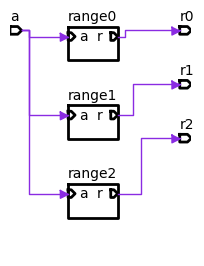

In [4]:
hw = py4hw.HWSystem()

a = hw.wire('a', 8)
r = hw.wires('r', 3, 1)

py4hw.Sequence(hw, 'a', [1,2,4,8,12,16,21,30], a)
RangeDetector(hw, 'dut', a, [[0,9], [10,20], [5,15]], r)

sch = py4hw.Schematic(hw.children['dut'])

sch.draw()

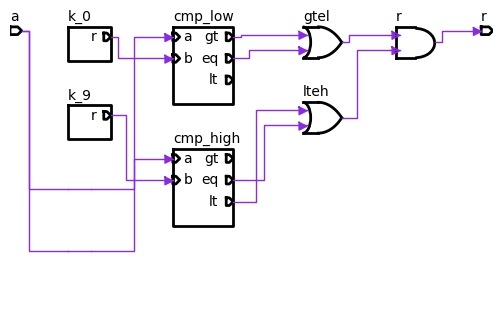

In [5]:
sch = py4hw.Schematic(hw.children['dut'].children['range0'])

sch.draw()

## Summary
- Abstract Logic provides a way to create a hierarchycal grouping of a subcircuit without the need of creating a new full class